you can find the data set at
[Kaggle/E-Commerce Shipping](https://www.kaggle.com/datasets/prachi13/customer-analytics?resource=download)

In [1]:
import pandas as pd
import numpy

In [2]:
data='Train.csv'
e_shipping=pd.read_csv(data)
e_shipping

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [3]:
# we check the data information summary for any null values in the dataset
e_shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
# the column
e_shipping.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [5]:
type(e_shipping.columns)

pandas.core.indexes.base.Index

In [6]:
e_shipping[['Mode_of_Shipment','Customer_care_calls','Customer_rating','Gender','Reached.on.Time_Y.N']].head(10)

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Gender,Reached.on.Time_Y.N
0,Flight,4,2,F,1
1,Flight,4,5,M,1
2,Flight,2,2,M,1
3,Flight,3,3,M,1
4,Flight,2,2,F,1
5,Flight,3,1,F,1
6,Flight,3,4,F,1
7,Flight,4,1,F,1
8,Flight,3,4,F,1
9,Flight,3,2,F,1


### some questions we would like to solve

1. count the most used form of shipment by the customers
2. customer rating of products and shipment 
3. customer rating (visualization)
5. was rached on time affected by the mode of transport

In [29]:
e_shipping['Product_importance'].head(10)

0       low
1       low
2       low
3    medium
4    medium
5    medium
6       low
7       low
8       low
9    medium
Name: Product_importance, dtype: object

## SQLite
we first import the sqlite3 library which comes instulled in python so no need of instulling it.

In [9]:
# import the sqlite library
import sqlite3 as sql

### uploading a csv file to sqlite
the code bellow is show how we formed a database called 'e_shipping.db' by using the sql.connect() function. then we push the csv file into the 'e_shipping.db' database using the dataframe.to_sql() function of which in our case the dataframe is 'e_shipping'. the code has been "#" so if you dont have the database you can un"#" them.

In [10]:
# we do some data cleaning
e_shipping = e_shipping.rename(columns={
    'Reached.on.Time_Y.N':'Reached_on_Time'
})

In [11]:
e_shipping

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [31]:
con = sql.connect('e_shipping.db')
e_shipping.to_sql("e_commerce_shipping", con, if_exists='replace')

10999

by cursor we can make queries to see if the data has been uploaded succesifully

In [32]:
cur  = con.cursor()

In [34]:
cur.execute('SELECT * FROM e_commerce_shipping')
result = cur.fetchall()
# to check the results un"#"
result

[(0, 1, 'D', 'Flight', 4, 2, 177, 3, 'low', 'F', 44, 1233, 1),
 (1, 2, 'F', 'Flight', 4, 5, 216, 2, 'low', 'M', 59, 3088, 1),
 (2, 3, 'A', 'Flight', 2, 2, 183, 4, 'low', 'M', 48, 3374, 1),
 (3, 4, 'B', 'Flight', 3, 3, 176, 4, 'medium', 'M', 10, 1177, 1),
 (4, 5, 'C', 'Flight', 2, 2, 184, 3, 'medium', 'F', 46, 2484, 1),
 (5, 6, 'F', 'Flight', 3, 1, 162, 3, 'medium', 'F', 12, 1417, 1),
 (6, 7, 'D', 'Flight', 3, 4, 250, 3, 'low', 'F', 3, 2371, 1),
 (7, 8, 'F', 'Flight', 4, 1, 233, 2, 'low', 'F', 48, 2804, 1),
 (8, 9, 'A', 'Flight', 3, 4, 150, 3, 'low', 'F', 11, 1861, 1),
 (9, 10, 'B', 'Flight', 3, 2, 164, 3, 'medium', 'F', 29, 1187, 1),
 (10, 11, 'C', 'Flight', 3, 4, 189, 2, 'medium', 'M', 12, 2888, 1),
 (11, 12, 'F', 'Flight', 4, 5, 232, 3, 'medium', 'F', 32, 3253, 1),
 (12, 13, 'D', 'Flight', 3, 5, 198, 3, 'medium', 'F', 1, 3667, 1),
 (13, 14, 'F', 'Flight', 4, 4, 275, 3, 'high', 'M', 29, 2602, 1),
 (14, 15, 'A', 'Flight', 4, 3, 152, 3, 'low', 'M', 43, 1009, 1),
 (15, 16, 'B', 'Flight',

then we close the connection

In [15]:
con.close()

## Data Analysis using sqlite3
now that our dataframe has been successifully uploaded there is no need to go through the upload process again, all we have to do is to make the connection to the database, which we do as follows

In [16]:
# we make a new conection to the data base
# the database name
database = 'e_shipping.db'
# now we connect to the database
con = sql.connect(database)

In [17]:
# we do a query connection
query = '''SELECT *  FROM e_commerce_shipping'''

In [18]:
df = pd.read_sql_query(query, con)
df.head()

,index,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [19]:
pd.read_sql_query('''SELECT * FROM e_commerce_shipping WHERE product_importance= 'high' ''', con)

,index,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,13,14,F,Flight,4,4,275,3,high,M,29,2602,1
1,18,19,D,Ship,5,5,239,3,high,M,18,2495,1
2,23,24,F,Ship,4,3,211,3,high,M,12,3922,1
3,26,27,A,Ship,4,1,172,3,high,F,24,1066,1
4,36,37,D,Ship,3,5,137,4,high,F,62,1477,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,10898,10899,A,Ship,4,1,222,2,high,M,3,5665,1
944,10908,10909,D,Ship,4,1,192,4,high,M,10,4570,1
945,10910,10911,A,Ship,5,5,264,8,high,F,10,5759,1
946,10956,10957,D,Flight,4,3,192,4,high,M,7,4949,0


In [20]:
pd.read_sql_query('''SELECT Mode_of_Shipment, ID, WareHouse_block FROM e_commerce_shipping WHERE Reached_on_Time = 0 ''', con)

,Mode_of_Shipment,ID,Warehouse_block
0,Road,3136,B
1,Road,3137,C
2,Road,3138,F
3,Road,3139,D
4,Road,3141,A
...,...,...,...
4431,Ship,10994,F
4432,Ship,10996,B
4433,Ship,10997,C
4434,Ship,10998,F


In [21]:
pd.read_sql_query('''SELECT DISTINCT Mode_of_Shipment, ID FROM e_commerce_shipping''' ,con)

,Mode_of_Shipment,ID
0,Flight,1
1,Flight,2
2,Flight,3
3,Flight,4
4,Flight,5
...,...,...
10994,Ship,10995
10995,Ship,10996
10996,Ship,10997
10997,Ship,10998


In [22]:
pd.read_sql_query('''SELECT DISTINCT( Mode_of_Shipment) FROM e_commerce_shipping  ''' ,con)

,Mode_of_Shipment
0,Flight
1,Ship
2,Road


## Data Visualizatiuons

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
e_shipping

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [25]:
customer_rating = e_shipping['Customer_rating']
customer_rating

0        2
1        5
2        2
3        3
4        2
        ..
10994    1
10995    1
10996    4
10997    2
10998    5
Name: Customer_rating, Length: 10999, dtype: int64

In [26]:
customer_care_calls = e_shipping['Customer_care_calls']

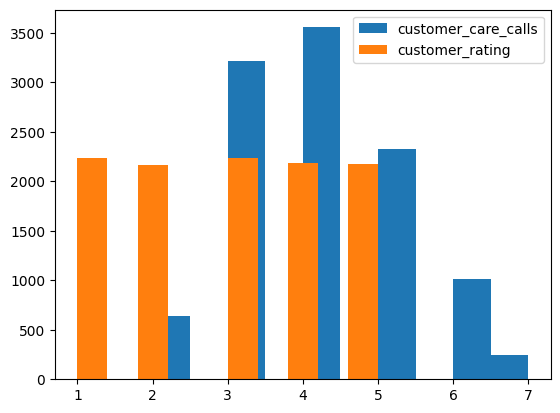

In [27]:
plt.hist( customer_care_calls)
plt.hist(customer_rating)
plt.legend(['customer_care_calls','customer_rating']);

In [28]:
mode_of_shipping= pd.read_sql_query('''SELECT DISTINCT( Mode_of_Shipment) FROM e_commerce_shipping  ''' ,con)
mode_of_shipping

,Mode_of_Shipment
0,Flight
1,Ship
2,Road
